In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\serha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df_com = pd.read_csv(r'C:\Users\serha\Downloads\reviews.csv.gz',compression='gzip',error_bad_lines=False)

In [3]:
df_com.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,20815,31174,2010-03-24,49388,Chuck,My daughter and her friend and I all stayed at...
1,20815,40738,2010-05-08,93598,Sara,You cannot find a better place to stay in Turk...
2,20815,49182,2010-06-02,108540,Suzan,This comfortable apartment truly deserves the ...
3,20815,85462,2010-08-27,126482,William,I second all the excellent reviews of this pla...
4,20815,89515,2010-09-03,180502,Pamela,Thanks to Firat and especially Arda for their ...


In [4]:
df_list = pd.read_csv(r'C:\Users\serha\Downloads\listings.csv.gz',compression='gzip',error_bad_lines=False)

In [5]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,20815,https://www.airbnb.com/rooms/20815,20201231072304,2021-01-04,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill.<br />...,"The lovely neighborhood, Arnavutkoy, is locate...",https://a0.muscache.com/pictures/94805791/481d...,78838,https://www.airbnb.com/users/show/78838,...,10.0,10.0,9.0,NaN,f,2,1,1,0,0.31
1,27271,https://www.airbnb.com/rooms/27271,20201231072304,2021-01-06,Lovely apartment in perfect location,This is a nicely decorated apartment in an an...,Cihangir is one of Istanbul's cosmopolitan sub...,https://a0.muscache.com/pictures/2f9cfc85-8370...,117026,https://www.airbnb.com/users/show/117026,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.30
2,28318,https://www.airbnb.com/rooms/28318,20201231072304,2021-01-02,Cosy home overlooking Bosphorus,<b>The space</b><br />Easy access to both brid...,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,https://www.airbnb.com/users/show/121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,29241,https://www.airbnb.com/rooms/29241,20201231072304,2021-01-04,"↪ Istanbul, Your second house",<b>The space</b><br />There are many interesti...,NaN,https://a0.muscache.com/pictures/12385994/b9ba...,125742,https://www.airbnb.com/users/show/125742,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,30697,https://www.airbnb.com/rooms/30697,20201231072304,2021-01-03,nice home in popular area,<b>The space</b><br />I can ensure you that th...,NaN,https://a0.muscache.com/pictures/6392807/b6f01...,132137,https://www.airbnb.com/users/show/132137,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01


In [6]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [7]:
df_ovr_ratings = df_list[['id','review_scores_rating']]

In [8]:
df_ovr_ratings.head()

,id,review_scores_rating
0,20815,90.0
1,27271,98.0
2,28318,NaN
3,29241,NaN
4,30697,80.0


In [9]:
print('There is total of',len(df_ovr_ratings),'rows with', (df_ovr_ratings['id'].nunique()/len(df_ovr_ratings))*100,'% of unique id numbers and', 100*df_ovr_ratings['review_scores_rating'].isna().sum()/len(df_ovr_ratings),'% of null values') 

There is total of 23650 rows with 100.0 % of unique id numbers and 54.00845665961945 % of null values


We have a unique set of ratings and id numbers. However, we have some null values on ratings side. There are several methods for dealing with the null values. However, in this case, more than half of the ids .

In [10]:
df_ovr_ratings.dropna(inplace=True)

<ipython-input-10-40f3fab5a1d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ovr_ratings.dropna(inplace=True)


In [11]:
print('There is total of',len(df_ovr_ratings),'rows with', (df_ovr_ratings['id'].nunique()/len(df_ovr_ratings))*100,'% of unique id numbers')

There is total of 10877 rows with 100.0 % of unique id numbers


Ratings set is now ready. Let's look at the ratings a little bit more closer. 

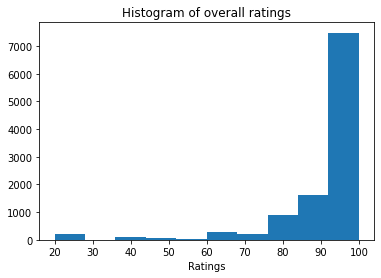

In [12]:
plt.hist(df_ovr_ratings['review_scores_rating'])
plt.title('Histogram of overall ratings')
plt.xlabel('Ratings')
plt.show()

Let's define a function for preprocessing.

In [13]:
def preprocess(text):

    # transform all to the lowercase
    text=text.lower()
    # remove hyperlinks if any
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)
    #Replace &amp, &lt, &gt with &,<,> respectively
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>') 
    #remove non ascii chars
    text=text.encode("ascii",errors="ignore").decode()
    #remove some puncts
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`!?.{|}~]+','',text)
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text

In [14]:
df_com.comments = df_com.comments.astype(str)

In [15]:
df_com['comments'] =df_com['comments'].apply(preprocess) 

In [16]:
wordcloud_text = " ".join(desc for desc in df_com.comments)
print ("There are {} words in the combination of all comments.".format(len(wordcloud_text)))

There are 47204197 words in the combination of all comments.


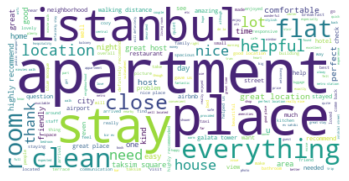

In [17]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(wordcloud_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As seen, words like stay, istanbul, apartment, place are very common words. I prefer to remove them in the first place because they are not distinctive for opinions. 

In [18]:
stopwords.update(['stay','istanbul','apartment','place'])

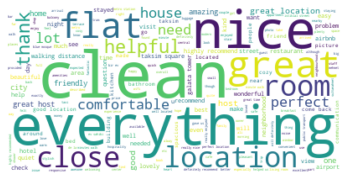

In [19]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(wordcloud_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As seen, used words make a little bit more sense now. So, let's keep the stopwords as updated by four words, and extract them from the column. 

In [20]:
df_com['comments'] = df_com['comments'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [21]:
control_text = " ".join(desc for desc in df_com.comments)
print ("There are {} words in the combination of all comments.".format(len(control_text)))

There are 32150465 words in the combination of all comments.


In [22]:
sid = SentimentIntensityAnalyzer()

In [23]:
df_com['scores'] = df_com['comments'].apply(lambda review: sid.polarity_scores(review))

In [24]:
df_com.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores
0,20815,31174,2010-03-24,49388,Chuck,daughter friend stayed apt owned gulder husban...,"{'neg': 0.026, 'neu': 0.671, 'pos': 0.303, 'co..."
1,20815,40738,2010-05-08,93598,Sara,find better turkey firat basar imagine staying...,"{'neg': 0.024, 'neu': 0.688, 'pos': 0.288, 'co..."
2,20815,49182,2010-06-02,108540,Suzan,comfortable truly deserves name bosphorus bed ...,"{'neg': 0.019, 'neu': 0.694, 'pos': 0.287, 'co..."
3,20815,85462,2010-08-27,126482,William,second excellent reviews neighborhood located ...,"{'neg': 0.047, 'neu': 0.66, 'pos': 0.292, 'com..."
4,20815,89515,2010-09-03,180502,Pamela,thanks firat especially arda kind hospitality ...,"{'neg': 0.013, 'neu': 0.586, 'pos': 0.401, 'co..."


In [25]:
df_com['scores'][0]

{'neg': 0.026, 'neu': 0.671, 'pos': 0.303, 'compound': 0.9913}

In [26]:
df_com['compound']  = df_com['scores'].apply(lambda score_dict: score_dict['compound'])

In [27]:
df_com.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores,compound
0,20815,31174,2010-03-24,49388,Chuck,daughter friend stayed apt owned gulder husban...,"{'neg': 0.026, 'neu': 0.671, 'pos': 0.303, 'co...",0.9913
1,20815,40738,2010-05-08,93598,Sara,find better turkey firat basar imagine staying...,"{'neg': 0.024, 'neu': 0.688, 'pos': 0.288, 'co...",0.9831
2,20815,49182,2010-06-02,108540,Suzan,comfortable truly deserves name bosphorus bed ...,"{'neg': 0.019, 'neu': 0.694, 'pos': 0.287, 'co...",0.9956
3,20815,85462,2010-08-27,126482,William,second excellent reviews neighborhood located ...,"{'neg': 0.047, 'neu': 0.66, 'pos': 0.292, 'com...",0.9163
4,20815,89515,2010-09-03,180502,Pamela,thanks firat especially arda kind hospitality ...,"{'neg': 0.013, 'neu': 0.586, 'pos': 0.401, 'co...",0.9953


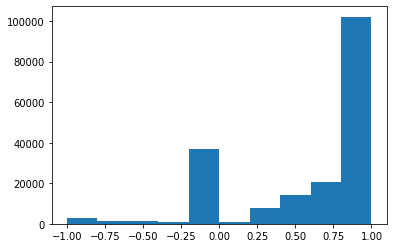

In [28]:
plt.hist(df_com['compound'])
plt.show()

As seen, there is positive and negative compound values. Positives are positive comments and negatives are negative comments. Before assign them -1 and +1, let's see if compound values is correlated with ratings or not.

In [29]:
df_comments_avg = df_com.groupby(['listing_id'])['compound'].mean()

In [30]:
df_comments_avg = pd.DataFrame(df_comments_avg)

In [31]:
df_comments_avg

,compound
listing_id,
20815,0.755339
27271,0.704970
30697,0.986000
33368,0.977300
35580,0.568582
...,...
47228209,0.796400
47233233,-0.401900
47236679,0.556300


In [32]:
df_ovr_ratings.set_index(['id'],inplace=True)

In [33]:
df_ovr_ratings

,review_scores_rating
id,
20815,90.0
27271,98.0
30697,80.0
33368,100.0
35580,90.0
...,...
47228209,60.0
47233233,100.0
47236679,100.0


In [34]:
df_comments_avg.index.rename('id')

Int64Index([   20815,    27271,    30697,    33368,    35580,    41753,
               44421,    44429,    47264,    48346,
            ...
            47201375, 47210711, 47214764, 47219427, 47227995, 47228209,
            47233233, 47236679, 47264225, 47268777],
           dtype='int64', name='id', length=11337)

In [35]:
merged_df = df_ovr_ratings.join(df_comments_avg,how='inner',on='id')

In [36]:
merged_df.head()

,review_scores_rating,compound
id,,
20815,90.0,0.755339
27271,98.0,0.704970
30697,80.0,0.986000
33368,100.0,0.977300
35580,90.0,0.568582


Now, let's see the plot

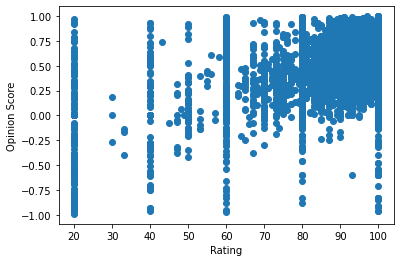

In [37]:
plt.scatter(merged_df['review_scores_rating'],merged_df['compound'])
plt.xlabel('Rating')
plt.ylabel('Opinion Score')
plt.show()

Interesting point is, there seems to be a correlation between comments and reviews at higher ratings, however, clearly there is no correlation at lower ratings. 